### Loading necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal


import warnings
warnings.filterwarnings("ignore")

### Introduction

HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.
 
 
**Agenda:** Identify how salary is varying with respect to other considerable factors.


### Feature Description

Gender - talks of the gender - Male or female

Business - if the person has a business or no

Age - age of the person

Salary - CTC of the employee

Dependants - number of people dependant on the person

Months - duration of the person employed with the company

Calls - if the person has authority to make calls or not

Type - salary settlement type

Billing - Subscribed to billing plans or no

Unit sales - unit sale made by the person

Total sales - total sales made by the person

Rating - If he has been given a rating by a superior or no

Bonus - amount received by a person as bonus for sales

Base pay - Base pay of the employee

Unit price - The Unit price of a sale

Volume - volume allotted to a person

Opening balance - The opening balance of an employee

Low - lowest balance allotted to a person.

Closing Balance- The closing balance of an employee

Education- Educational background of an employee.

### Loading the dataset

In [2]:
data = pd.read_csv('C:/Users/vicky/Downloads/New_data_Set.csv')

### Print first 10 Data points

In [3]:
data.head(10)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00000,2035.600000,254.450000,3.77,21226600,3.7500,3.760,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12000,2279.248000,284.906000,3.74,10462800,3.8500,3.680,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65000,2358.660000,294.832500,3.89,18761000,4.2300,4.290,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12000,2450.048000,306.256000,4.35,66130600,4.2600,4.310,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00000,2498.000000,312.250000,4.34,26868200,4.7900,4.410,4.08,18.80,19.05,1,High School or less
5,Male,0,No,Yes,Two year,Yes,No,23,6444.23000,2577.692000,322.211500,4.37,29869600,5.8800,5.040,4.13,18.80,19.1,1,High School or less
6,Male,0,Yes,No,Two year,Yes,No,23,6455.50000,2582.200000,322.775000,4.42,25239200,6.0925,5.590,4.15,18.80,19.1,1,High School or less
7,Female,0,No,Yes,One year,Yes,No,24,6458.35722,2583.342888,322.917861,4.44,28307500,6.1000,5.670,4.21,18.80,19.15,1,Intermediate
8,Female,1,No,Yes,Month-to-month,Yes,Yes,24,6529.23000,2611.692000,326.461500,4.45,24295600,6.1500,6.170,4.27,18.85,19.2,1,Intermediate
9,Male,0,No,Yes,Month-to-month,Yes,No,43,6682.33000,2672.932000,334.116500,4.41,17671600,6.2600,6.095,4.22,18.85,19.2,1,Intermediate


### Checking the data type and Null values (if any)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

### Checking the unique values in all categorical columns

In [5]:
print('unique values in Gender:',data['Gender'].unique())
print('unique values in Dependancies:',data['Dependancies'].unique())
print('unique values in Type:',data['Type'].unique())
print('unique values in Education:',data['Education'].unique())
print('unique values in Billing:',data['Billing'].unique())
print('unique values in Calls:',data['Calls'].unique())
print('unique values in Business:',data['Business'].unique())
print('unique values in Rating:',data['Rating'].unique())
print('unique values in Months:',data['Months'].unique())

unique values in Gender: ['Female' 'Male']
unique values in Dependancies: ['No' 'Yes']
unique values in Type: ['Month-to-month' 'Two year' 'One year']
unique values in Education: ['High School or less' 'Intermediate' 'Graduation' 'PG']
unique values in Billing: ['No' 'Yes']
unique values in Calls: ['Yes' 'No']
unique values in Business: [0 1]
unique values in Rating: ['Yes' 'No']
unique values in Months: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


### Converting the 'Total_asales' column to numeric data-type

In [6]:
data['Total_Sales']=pd.to_numeric(data['Total_Sales'],errors='coerce')

### Checking for total no, of null values across all columns

In [7]:
data.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

##### Since we have less very less no. of null values in Base_pay and Total_Sales columns so we can drop the null value rows as it will not have any major data loss but in opening balance the null values are more than 25% so we will just fill them by median values so that outlier won't have much impact on the accuracy of our model going further 

In [8]:
data['openingbalance'].fillna(data['openingbalance'].median(),inplace=True)

In [9]:
data.dropna(subset = ['Base_pay'], axis = 0, inplace = True)

In [10]:
data.dropna(subset = ['Total_Sales'], axis = 0, inplace = True)

### Checking now if there is no null values present in our dataset

In [11]:
data.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

### Checking correlation between all columns to see the correlation with our target variable (Salary)

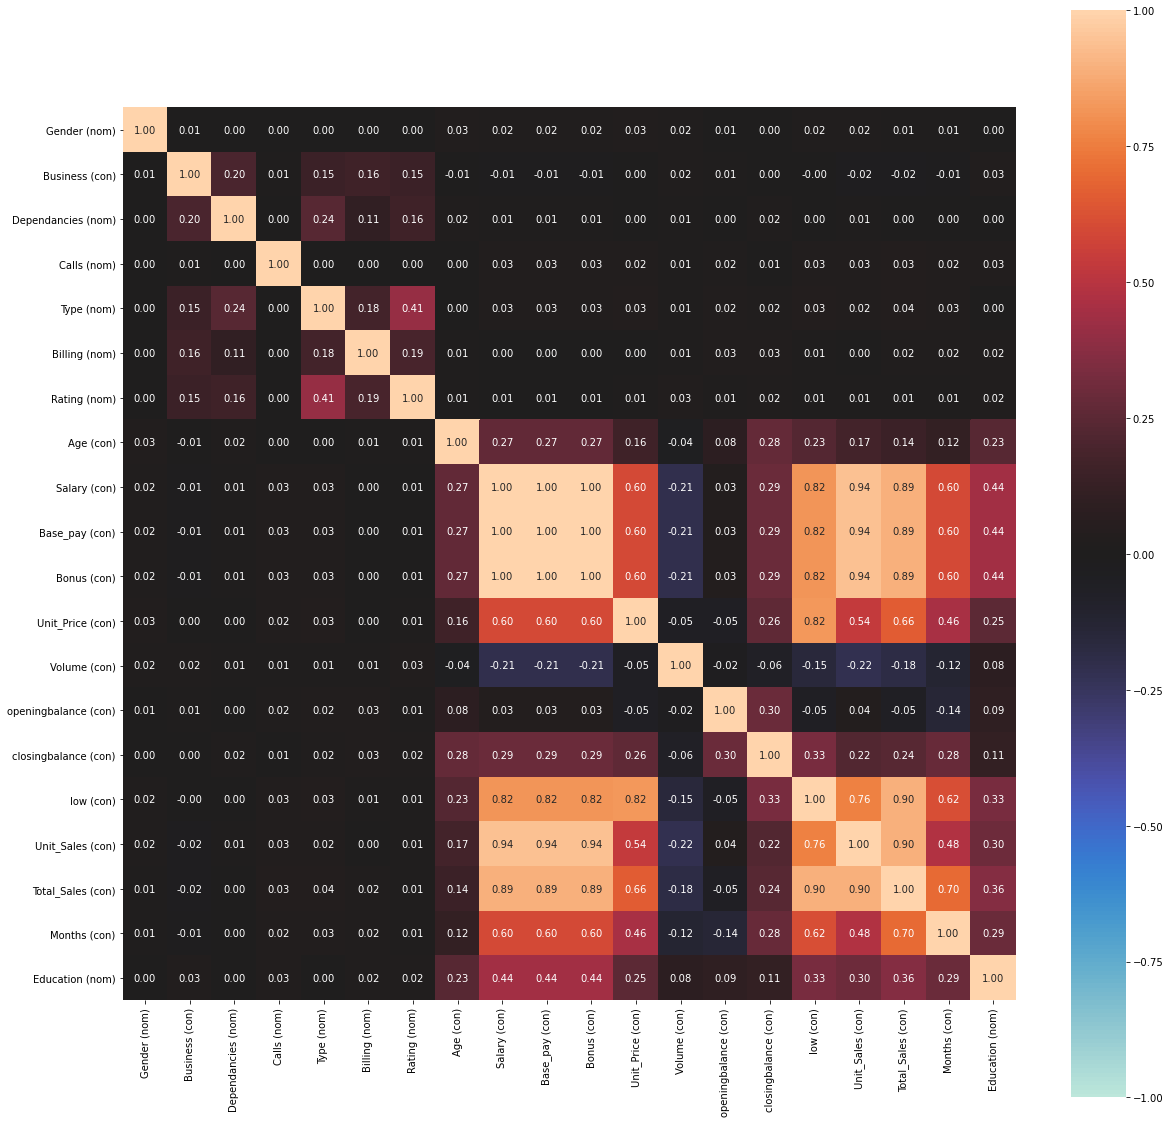

{'corr':                       Gender (nom)  Business (con)  Dependancies (nom)  \
 Gender (nom)              1.000000        0.005787            0.000000   
 Business (con)            0.005787        1.000000            0.195442   
 Dependancies (nom)        0.000000        0.195442            1.000000   
 Calls (nom)               0.000000        0.010534            0.000000   
 Type (nom)                0.000000        0.146447            0.241030   
 Billing (nom)             0.000000        0.156300            0.108436   
 Rating (nom)              0.002167        0.147175            0.161192   
 Age (con)                 0.025434       -0.007391            0.017969   
 Salary (con)              0.021337       -0.011353            0.012738   
 Base_pay (con)            0.021305       -0.011682            0.013443   
 Bonus (con)               0.021337       -0.011353            0.012738   
 Unit_Price (con)          0.026027        0.000416            0.002948   
 Volume (con)    

In [12]:
nominal.associations(data,figsize=(20,20),mark_columns=True)

### Checking to ensure zero duplicacy

In [13]:
data[data.duplicated()]

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education


### Gender wise distrbution

Male      2504
Female    2457
Name: Gender, dtype: int64


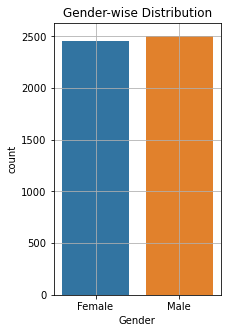

In [14]:
print(data['Gender'].value_counts())

plt.figure(figsize = (3,5))
plt.title('Gender-wise Distribution')
sns.countplot(data['Gender'])
plt.grid(True)

### Dependancy-wise Distribution of Employees

No     3500
Yes    1461
Name: Dependancies, dtype: int64


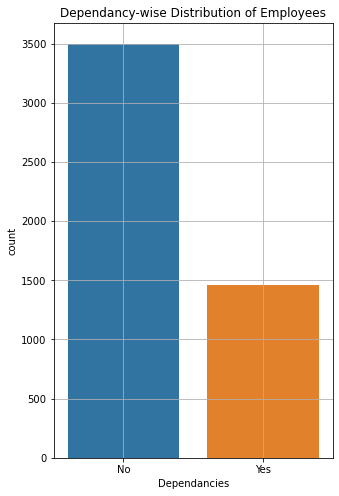

In [15]:
print(data['Dependancies'].value_counts())

plt.figure(figsize = (5,8))
plt.title('Dependancy-wise Distribution of Employees')
sns.countplot(data['Dependancies'])
plt.grid(True)

### Type-wise Distribution of Employees

Month-to-month    2755
Two year          1187
One year          1019
Name: Type, dtype: int64


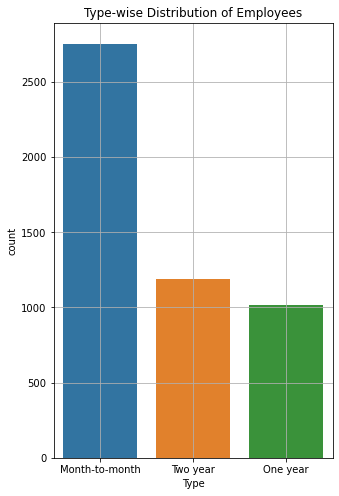

In [16]:
print(data['Type'].value_counts())

plt.figure(figsize = (5,8))
plt.title('Type-wise Distribution of Employees')
sns.countplot(data['Type'])
plt.grid(True)

### Qualification-wise Distribution of Employees

PG                     2944
Graduation             1977
Intermediate             26
High School or less      14
Name: Education, dtype: int64


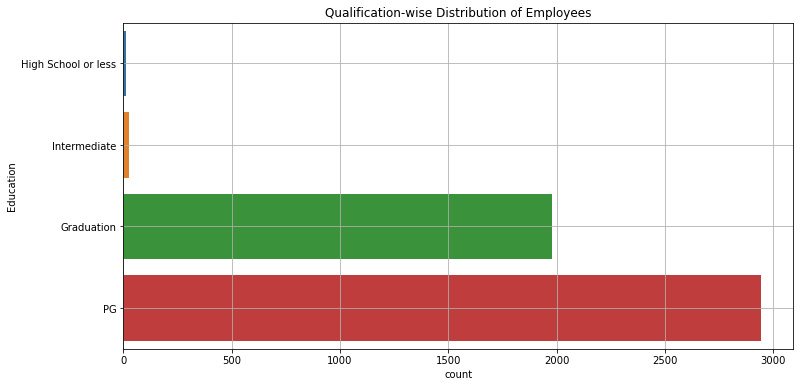

In [17]:
print(data['Education'].value_counts())

plt.figure(figsize = (12,6))
plt.title('Qualification-wise Distribution of Employees')
sns.countplot(y = data['Education'])
plt.grid(True)

### Subscription to Billing or not?

Yes    2934
No     2027
Name: Billing, dtype: int64


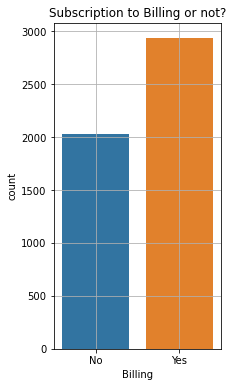

In [18]:
print(data['Billing'].value_counts())

plt.figure(figsize = (3,6))
plt.title('Subscription to Billing or not?')
sns.countplot(data['Billing'])
plt.grid(True)

### Employees making calls vs not making calls

Yes    4502
No      459
Name: Calls, dtype: int64


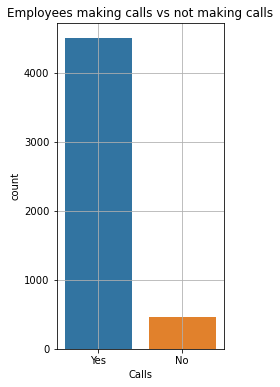

In [19]:
print(data['Calls'].value_counts())

plt.figure(figsize = (3,6))
plt.title('Employees making calls vs not making calls')
sns.countplot(data['Calls'])
plt.grid(True)

### Rating-wise Distribution of Employees

No     3651
Yes    1310
Name: Rating, dtype: int64


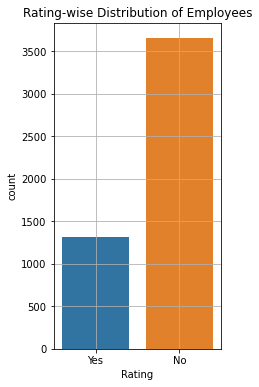

In [20]:
print(data['Rating'].value_counts())

plt.figure(figsize = (3,6))
plt.title('Rating-wise Distribution of Employees')
sns.countplot(data['Rating'])
plt.grid(True)

### Gender-wise Salary Distribution on the basis of calls

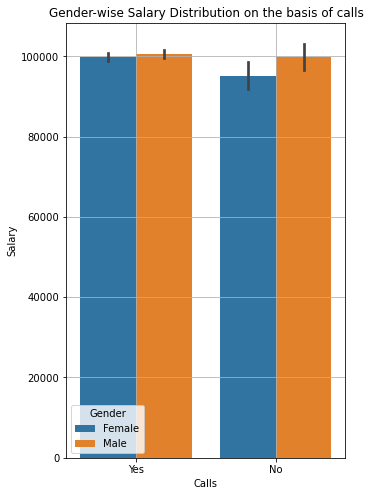

In [21]:
plt.figure(figsize = (5,8))
plt.title('Gender-wise Salary Distribution on the basis of calls')
sns.barplot(x = 'Calls', y = 'Salary', hue = 'Gender', data = data)
plt.grid(True)

### Gender-wise Salary Distribution on the basis of Rating

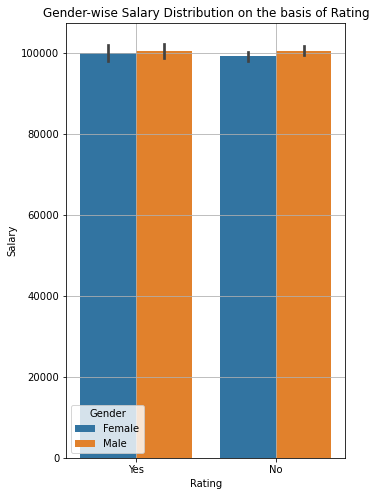

In [22]:
plt.figure(figsize = (5,8))
plt.title('Gender-wise Salary Distribution on the basis of Rating')
sns.barplot(x = 'Rating', y = 'Salary', hue = 'Gender', data = data)
plt.grid(True)

### Gender-wise Salary Distribution on the basis of Education

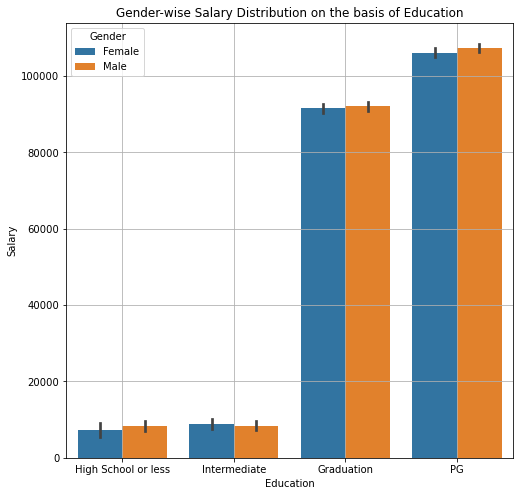

In [23]:
plt.figure(figsize = (8,8))
plt.title('Gender-wise Salary Distribution on the basis of Education')
sns.barplot(x = 'Education', y = 'Salary', hue = 'Gender', data = data)
plt.grid(True)

### Gender-wise Bonus Distribution on the basis of Education

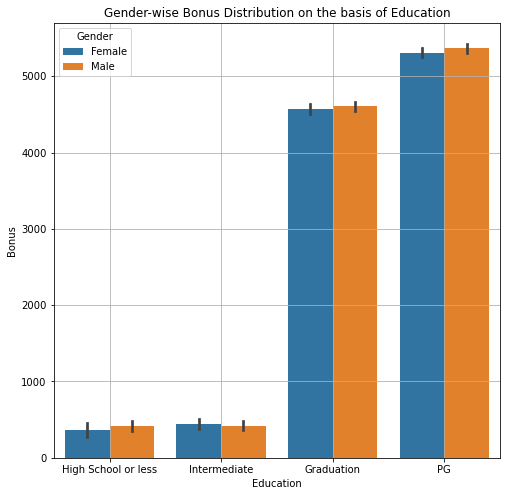

In [24]:
plt.figure(figsize = (8,8))
plt.title('Gender-wise Bonus Distribution on the basis of Education')
sns.barplot(x = 'Education', y = 'Bonus', hue = 'Gender', data = data)
plt.grid(True)

### Gender-wise Bonus Distribution on the basis of Education

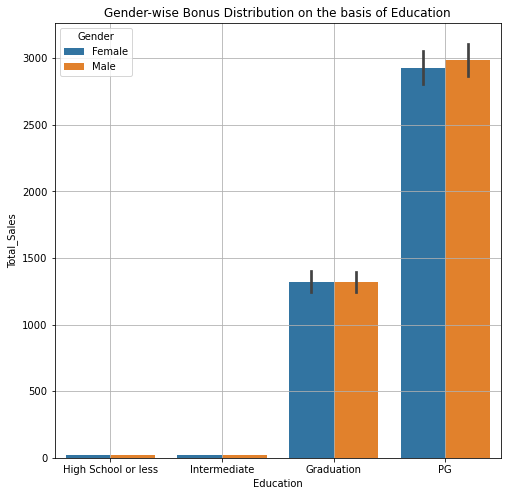

In [25]:
plt.figure(figsize = (8,8))
plt.title('Gender-wise Bonus Distribution on the basis of Education')
sns.barplot(x = 'Education', y = 'Total_Sales', hue = 'Gender', data = data)
plt.grid(True)

### Gender-wise Volume Distribution on the basis of Education

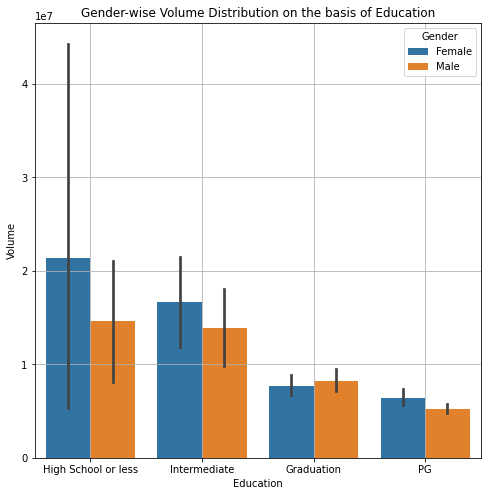

In [26]:
plt.figure(figsize = (8,8))
plt.title('Gender-wise Volume Distribution on the basis of Education')
sns.barplot(x = 'Education', y = 'Volume', hue = 'Gender', data = data)
plt.grid(True)

### Salary trend with respect to Age

Text(0.5, 1.0, 'Salary with respect to Age')

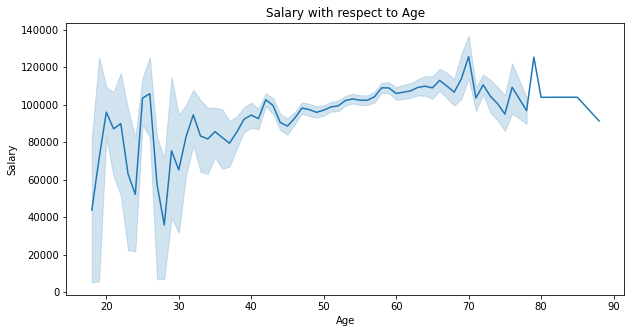

In [27]:
plt.figure(figsize = (10,5))
sns.lineplot(x="Age",  y = 'Salary',data = data).set_title("Salary with respect to Age")

### Creating a checkpoint for further data preprocessing.

In [28]:
df = data

### Label encoding change categorical to numerical to feed it to ML algorithm

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Dependancies'] = le.fit_transform(df['Dependancies'])
df['Calls'] = le.fit_transform(df['Calls'])
df['Type'] = le.fit_transform(df['Type'])
df['Billing'] = le.fit_transform(df['Billing'])
df['Rating'] = le.fit_transform(df['Rating'])
df['Education'] = le.fit_transform(df['Education'])

### Separating dependant variable (target) and independent variables (Features)

In [30]:
X = df.drop('Salary',axis = 1)
Y = df['Salary']

#### Printing the independent variables (Features)

In [31]:
X.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,0,1,0,0,1,18,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,1
1,0,0,0,1,0,0,1,19,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1
2,1,0,0,1,0,1,0,22,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,1
3,0,1,0,1,0,1,1,21,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,1
4,1,0,0,1,0,1,1,23,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,1


#### Printing the dependent variables (Target)

In [32]:
Y.head(3)

0    5089.00
1    5698.12
2    5896.65
Name: Salary, dtype: float64

### Using model selection for splitting train-test sets in ratio of 7:3

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Printing the shape of train-test shape of both independent and dependent variables

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3472, 19)
(1489, 19)
(3472,)
(1489,)


### checking the spearman correlation between the variables to check if there is multicollinearity between the independent variables

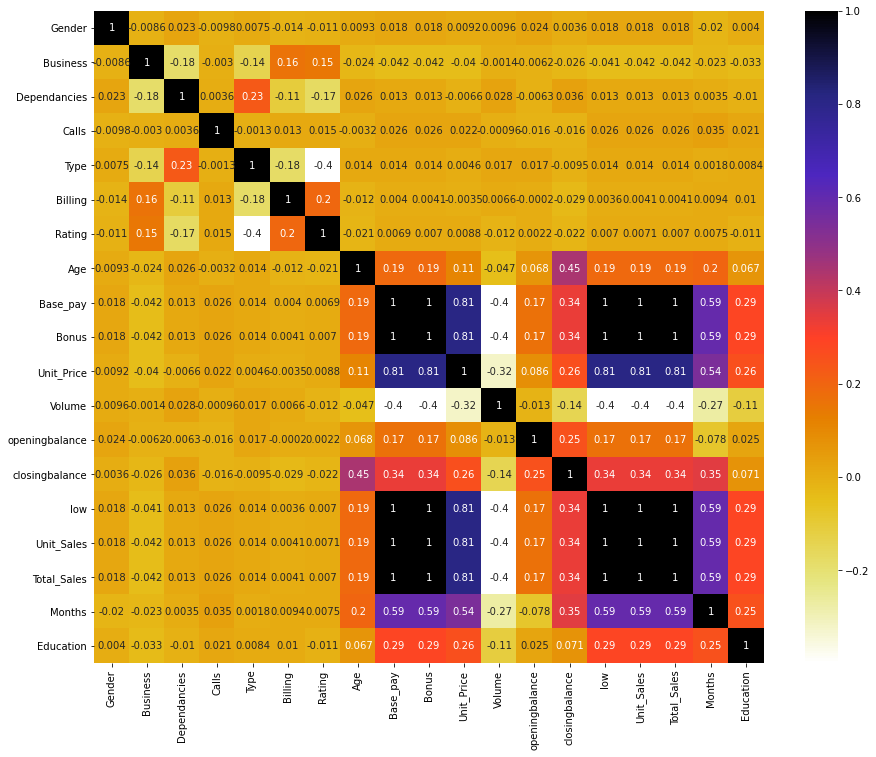

In [35]:
plt.figure(figsize = (15,12))
cor = X_train.corr(method='spearman')
sns.heatmap(cor,annot=True,cmap =plt.cm.CMRmap_r)
plt.show()

### find and remove multi-collinearity if threshold is greater than 85% 

In [36]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method = 'spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

### checking the total no. of multicollinear features that can cause overfitting in our ML algorithm

In [37]:
corr_features = correlation(X_train,0.85)
len(set(corr_features))

4

### Showing the names of multicollinear features having correlating more than 85% with each other

In [38]:
corr_features

{'Bonus', 'Total_Sales', 'Unit_Sales', 'low'}

### Dropping these highly correlated features from both training and test independent features to remove multicollinearity

In [39]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

### Modified training dataset after removing multi-collinearity

In [40]:
X_train.head(3)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Unit_Price,Volume,openingbalance,closingbalance,Months,Education
1559,0,0,0,1,0,1,1,47,35534.35602,49.610001,1755800,28.530001,18.290001,1,3
4151,1,0,0,1,2,0,0,57,49220.96530,61.970001,1536800,33.119999,25.690001,57,3
3348,0,0,1,1,0,0,1,45,44549.19404,45.799999,3118200,61.110001,100.440002,33,0


### Using Standardization of training features to handle outliers i.e., bring mean nearly to 0 and standard deviation towards 1

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Gender', 'Business', 'Dependancies','Calls','Type','Billing','Rating','Age','Base_pay','Unit_Price','Volume','openingbalance','closingbalance','Months','Education'])
 
print("Scaled Dataset Using StandardScaler")
X_train_scaled.head()

Scaled Dataset Using StandardScaler


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Unit_Price,Volume,openingbalance,closingbalance,Months,Education
0,-1.016261,-0.435725,-0.644523,0.318078,-0.827200,0.842820,1.705846,-0.555288,-0.433763,-0.021304,-0.320187,-0.370717,-0.681214,-1.277928,0.817424
1,0.983999,-0.435725,-0.644523,0.318078,1.555246,-1.186494,-0.586219,0.606624,0.920500,0.234190,-0.334010,-0.237137,-0.485560,0.996752,0.817424
2,-1.016261,-0.435725,1.551535,0.318078,-0.827200,-1.186494,1.705846,-0.787671,0.458238,-0.100061,-0.234195,0.577443,1.490808,0.021889,-1.232237
3,0.983999,-0.435725,1.551535,0.318078,1.555246,0.842820,-0.586219,0.258050,1.472499,1.360143,-0.358424,-0.237137,0.161949,1.524802,0.817424
4,0.983999,2.295027,-0.644523,0.318078,-0.827200,0.842820,-0.586219,1.419962,2.107789,2.482169,0.233080,-0.237137,2.108969,1.606041,0.817424


### Changing the training response variable to DataFrame

In [42]:
Y_train = pd.DataFrame(Y_train)

#### Displaying training response variable into DataFrame type

In [43]:
Y_train

,Salary
1559,88835.89005
4151,123052.41320
3348,111372.98510
4695,136999.09900
4940,153050.22360
...,...
4962,157273.00070
3293,110630.06610
1681,90487.95861
2635,102289.87480


### Using Standardization of training dependent/response feature to handle outliers i.e., bring mean nearly to 0 and standard deviation towards 1

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

Y_train_scaled = scale.fit_transform(Y_train.to_numpy())
Y_train_scaled = pd.DataFrame(Y_train_scaled, columns=['Salary'])
print("Scaled Dataset Using StandardScaler")
Y_train_scaled.head()

Scaled Dataset Using StandardScaler


,Salary
0,-0.433477
1,0.927394
2,0.462876
3,1.482086
4,2.120477


### Changing the testing response variable to DataFrame

In [45]:
Y_test = pd.DataFrame(Y_test)

### Using Standardization of testing dependent/response variable to handle outliers i.e., bring mean nearly to 0 and standard deviation towards 1

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

Y_test_scaled = scale.fit_transform(Y_test.to_numpy())
Y_test_scaled = pd.DataFrame(Y_test_scaled, columns=['Salary'])
print("Scaled Dataset Using StandardScaler")
Y_test_scaled.head()

Scaled Dataset Using StandardScaler


,Salary
0,-0.190081
1,-0.121182
2,-0.226524
3,0.999411
4,-0.471781


### Using Standardization of testing independent features to handle outliers i.e., bring mean nearly to 0 and standard deviation towards 1

In [47]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_test_scaled = scale.fit_transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Gender', 'Business', 'Dependancies','Calls','Type','Billing','Rating','Age','Base_pay','Unit_Price','Volume','openingbalance','closingbalance','Months','Education'])
 
print("Scaled Dataset Using StandardScaler")
X_test_scaled.head()

Scaled Dataset Using StandardScaler


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Unit_Price,Volume,openingbalance,closingbalance,Months,Education
0,1.006063,-0.439442,-0.649737,0.32215,0.415829,0.804440,-0.628889,0.227407,-0.191811,-0.289157,-0.215878,0.448524,-0.400403,-1.058018,0.836797
1,1.006063,2.275615,-0.649737,0.32215,-0.805413,0.804440,1.590106,0.469185,-0.123348,0.240989,-0.227678,0.995775,-0.320317,-0.976190,-1.204696
2,1.006063,-0.439442,-0.649737,0.32215,1.637072,-1.243101,-0.628889,0.106519,-0.228023,-0.447526,0.753594,0.303377,-0.453901,-1.098932,-1.204696
3,-0.993974,-0.439442,-0.649737,0.32215,0.415829,0.804440,-0.628889,1.194517,0.990157,0.299192,0.079500,-0.239070,-0.408092,1.110417,0.836797
4,1.006063,-0.439442,1.539084,0.32215,1.637072,0.804440,-0.628889,-0.618814,-0.471730,-0.332176,-0.241870,-0.399050,-0.731322,-1.262587,0.836797


### Printing the standardized shape of train-test shape of both independent and dependent variables.

In [48]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(Y_train_scaled.shape)
print(Y_test_scaled.shape)

(3472, 15)
(1489, 15)
(3472, 1)
(1489, 1)


### feeding the standardized features to Linear Regression model

In [49]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train_scaled,Y_train_scaled)

LinearRegression()

#### Prediction

In [50]:
y_pred = linreg.predict(X_test_scaled)

#### Checking accuracy score

In [51]:
from sklearn.metrics import r2_score
score = r2_score(Y_test_scaled,y_pred)

In [52]:
score

0.9986751540422295

#### Checking *"r2_score"*, *"adjusted r2 score"*, *"MAPE"*

In [53]:
from sklearn import metrics

def scores(y, y_):
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X.shape[1]-1)))
    print('r square', metrics.r2_score(y, y_))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    
scores(Y_test_scaled, y_pred)

Adjusted r square:0.9986580185260977
r square 0.9986751540422295
MAPE:Salary    2.696895
dtype: float64


### Cross-validation test to check the stability of our model with 30 folds

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X_train_scaled, Y_train_scaled, cv=30)
scores

array([0.99928044, 0.99377184, 0.99956447, 0.99946042, 0.999932  ,
       0.99994726, 0.9999553 , 0.99989752, 0.99940551, 0.99995583,
       0.99995966, 0.99995374, 0.99973268, 0.99982276, 0.9994269 ,
       0.9994489 , 0.99993037, 0.99976394, 0.99980077, 0.99980912,
       0.9959636 , 0.99380587, 0.99993183, 0.99557654, 0.99044237,
       0.99993287, 0.99973621, 0.99893107, 0.99219049, 0.99898811])

#### Trying to verify the predictions accuracy

In [55]:
Y_test_scaled

,Salary
0,-0.190081
1,-0.121182
2,-0.226524
3,0.999411
4,-0.471781
...,...
1484,0.189826
1485,-1.290055
1486,0.105706
1487,0.546437


In [56]:
y_pred

array([[-0.19005591],
       [-0.11984934],
       [-0.22698142],
       ...,
       [ 0.10209817],
       [ 0.53842466],
       [-0.24770381]])

***Conclusion-*** Model looks very accurate, as some irrelevant features which are not affecting the target variables are included so suspecting that there could be overfitting which may lead to inaccuracy when new values for independent variables are fed to it.

#### Displaying the previously fed data to Linear Regression Model

In [57]:
X_train_scaled.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Base_pay,Unit_Price,Volume,openingbalance,closingbalance,Months,Education
0,-1.016261,-0.435725,-0.644523,0.318078,-0.827200,0.842820,1.705846,-0.555288,-0.433763,-0.021304,-0.320187,-0.370717,-0.681214,-1.277928,0.817424
1,0.983999,-0.435725,-0.644523,0.318078,1.555246,-1.186494,-0.586219,0.606624,0.920500,0.234190,-0.334010,-0.237137,-0.485560,0.996752,0.817424
2,-1.016261,-0.435725,1.551535,0.318078,-0.827200,-1.186494,1.705846,-0.787671,0.458238,-0.100061,-0.234195,0.577443,1.490808,0.021889,-1.232237
3,0.983999,-0.435725,1.551535,0.318078,1.555246,0.842820,-0.586219,0.258050,1.472499,1.360143,-0.358424,-0.237137,0.161949,1.524802,0.817424
4,0.983999,2.295027,-0.644523,0.318078,-0.827200,0.842820,-0.586219,1.419962,2.107789,2.482169,0.233080,-0.237137,2.108969,1.606041,0.817424


On the basis of domain expertise I concluded that few features like Gender, Business, Dependancies, Age, Base_pay, Volume, openingbalance,closingbalance also plays no important role in prediction Salary.

#### Taking only considerable features to train our ML model

In [58]:
final_X_trainer = X_train_scaled[['Calls','Type','Billing','Rating','Months','Education','Unit_Price']]

In [59]:
final_X_trainer.head()

,Calls,Type,Billing,Rating,Months,Education,Unit_Price
0,0.318078,-0.827200,0.842820,1.705846,-1.277928,0.817424,-0.021304
1,0.318078,1.555246,-1.186494,-0.586219,0.996752,0.817424,0.234190
2,0.318078,-0.827200,-1.186494,1.705846,0.021889,-1.232237,-0.100061
3,0.318078,1.555246,0.842820,-0.586219,1.524802,0.817424,1.360143
4,0.318078,-0.827200,0.842820,-0.586219,1.606041,0.817424,2.482169


In [60]:
final_X_tester = X_test_scaled[['Calls','Type','Billing','Rating','Months','Education','Unit_Price']]

In [61]:
final_X_tester.head()

,Calls,Type,Billing,Rating,Months,Education,Unit_Price
0,0.32215,0.415829,0.804440,-0.628889,-1.058018,0.836797,-0.289157
1,0.32215,-0.805413,0.804440,1.590106,-0.976190,-1.204696,0.240989
2,0.32215,1.637072,-1.243101,-0.628889,-1.098932,-1.204696,-0.447526
3,0.32215,0.415829,0.804440,-0.628889,1.110417,0.836797,0.299192
4,0.32215,1.637072,0.804440,-0.628889,-1.262587,0.836797,-0.332176


### Training our LR model again and trying to predict and check the accuracy score with the considerable features only

In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(final_X_trainer,Y_train_scaled)

LinearRegression()

In [63]:
y_pred = linreg.predict(final_X_tester)

In [64]:
from sklearn.metrics import r2_score
score = r2_score(Y_test_scaled,y_pred)

In [65]:
score

0.505491035120087

Accuracy score is now very less

#### Checking the stability of score using cross validation with 30 folds.

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, final_X_trainer, Y_train_scaled, cv=30)
scores

array([0.56044529, 0.29352138, 0.44850134, 0.55111474, 0.49137107,
       0.42843524, 0.50008884, 0.50243667, 0.39230173, 0.55076151,
       0.41042223, 0.57548461, 0.47848886, 0.39642983, 0.50734964,
       0.55471444, 0.43588902, 0.51652438, 0.59480538, 0.53799476,
       0.5087576 , 0.39513395, 0.46184637, 0.50794626, 0.59266485,
       0.45553489, 0.44734057, 0.57921866, 0.42034886, 0.5352014 ])

***Conclusion-*** Since the accuracy was too less and on top of that the stability of our model was also not upto the mark.

### Using RandomForestRegressor to train the model as Linear Regression model seems less accurate.

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor()
regressor_RF.fit(final_X_trainer, Y_train_scaled)

RandomForestRegressor()

#### Predicting and checking the accuracy

In [68]:
predictions_RF = regressor_RF.predict(final_X_tester)

In [69]:
from sklearn.metrics import r2_score
score = r2_score(Y_test_scaled,predictions_RF)

In [70]:
score

0.8959482959086509

Accuracy score is very well with RandomForestRegressor

#### Checking the stability of score using cross validation with 30 folds.

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor_RF, final_X_trainer, Y_train_scaled, cv=30)
scores

array([0.97325537, 0.99028697, 0.99584227, 0.98177698, 0.96471339,
       0.99613242, 0.9906628 , 0.92445233, 0.97487573, 0.93941644,
       0.90164347, 0.99790451, 0.9879651 , 0.96962551, 0.99324083,
       0.90726223, 0.99474545, 0.98538678, 0.99123875, 0.9748934 ,
       0.99349495, 0.90616105, 0.97361363, 0.97745847, 0.9871468 ,
       0.99492683, 0.95805863, 0.99858042, 0.96335847, 0.97145791])

***Conclusion-*** Since the accuracy was good and on top of that the stability of our model is also acceptable, so we can say that Random Forest Regressor trains our model better than Linear Regression.

### Using XG Boost Regressor to train the model to check if we can achieve more accurate predicting model than Random Forest Regressor.

In [72]:
from xgboost import XGBRegressor
regressor_XGB = XGBRegressor()
regressor_XGB.fit(final_X_trainer, Y_train_scaled)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
predictions_XGB = regressor_XGB.predict(final_X_tester)

#### Predicting and checking the accuracy

In [73]:
from sklearn.metrics import r2_score
score = r2_score(Y_test_scaled,predictions_XGB)

In [74]:
score

0.8993864714504715

#### Checking the stability of score using cross validation with 30 folds.

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor_XGB, final_X_trainer, Y_train_scaled, cv=30)
scores

array([0.96835237, 0.98342492, 0.99262666, 0.98849741, 0.96632448,
       0.99466888, 0.9789125 , 0.89558352, 0.97282113, 0.94058417,
       0.90751493, 0.99875642, 0.98978313, 0.93625642, 0.99074274,
       0.90837775, 0.99424067, 0.91219523, 0.9973176 , 0.97530892,
       0.98655233, 0.89223467, 0.94855501, 0.97707153, 0.99759179,
       0.99879824, 0.96400123, 0.99745114, 0.91446901, 0.97908965])

***Conclusion-*** It is clear that accuracy is good for both when predicted with Random Forest Regression Model and XG Boost Regression model and on top of that the stability of both models are also acceptable, so we can say that either Random Forest Regressor or XG Boost Regressor trains our model better than Linear Regression.

### Performing Hyper-Parameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split':range(2,5,1), 
               'min_samples_leaf':range(1, 2, 4),
               'min_samples_split':(2, 5, 10)}
rf_random = RandomizedSearchCV(estimator = regressor_RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(final_X_trainer, Y_train_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': range(1, 2, 4),
                                        'min_samples_split': (2, 5, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [78]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=1000)

In [79]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50}

#### Random Forest with Hyperparameter tuning

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(max_depth= 100, min_samples_split=2,n_estimators=400, min_samples_leaf=1)

In [81]:
regressor_RF.fit(final_X_trainer, Y_train_scaled)

RandomForestRegressor(max_depth=100, n_estimators=400)

In [82]:
predictions_RF = regressor_RF.predict(final_X_tester)

In [83]:
predictions_RF = pd.DataFrame(predictions_RF)

In [84]:
#With Tuning 
from sklearn.metrics import r2_score
score = r2_score(Y_test_scaled,predictions_RF)

In [85]:
score

0.8943284674438348

In [86]:
Y_test_scaled

,Salary
0,-0.190081
1,-0.121182
2,-0.226524
3,0.999411
4,-0.471781
...,...
1484,0.189826
1485,-1.290055
1486,0.105706
1487,0.546437


In [87]:
predictions_RF

,0
0,-0.248712
1,-0.089230
2,-0.189088
3,1.008958
4,-0.730987
...,...
1484,0.248903
1485,-1.229097
1486,0.124848
1487,0.573338
